## Final Logistic Baseline Models (most updated dataset)

Ran 4 different models, 2 with all 21 features and 2 with 13 features (8 removed)

Important statistics:  

- Model with best accuracy:  
  - Binary Logistc Regression Model with 21 features, L1 reg, solver = 'lbfgs'  
  - Accuracy = 91.06%

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

df = pd.read_csv('C:/Users/acts5/Downloads/ECS 171/diabetes-risk-predictor/3_to_classes_.csv')

print(df.head())
print(df.to_numpy())
print(df.shape)


   Diabetes_binary  HighBP  HighChol  CholCheck  NEW_BMI_class  Smoker  \
0                0       1         0          1              0       0   
1                0       1         1          1              0       1   
2                0       0         0          1              0       0   
3                0       1         1          1              0       1   
4                0       0         0          1              0       1   

   Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0       0                     0             1       0  ...              1   
1       1                     0             0       1  ...              1   
2       0                     0             1       1  ...              1   
3       0                     0             1       1  ...              1   
4       0                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MetHlth_Class  PhyHlth_Class  DiffWalk  Sex  Age  \
0            0 

#### One-Hot Encoded All Features
#### 21 Feature Dataset & 13 Feature Dataset (Remove 8)

In [ ]:

#---------------- 21 Features Dataset -------------------

#numpy arrays
y_21 = df.iloc[ :, 0].values.astype(np.float32) #target variable column... just the first column
X_21 = df.iloc[ :, 1:] #predictor variable columns... everything from the second to last column
X_encoded = pd.get_dummies(X_21.astype(str), prefix=X_21.columns.astype(str))

X_21 = X_encoded.values

# Train/test split
from sklearn.model_selection import train_test_split
X_train_21, X_test_21, y_train_21, y_test_21 = train_test_split(X_21, y_21, test_size=0.2, random_state=42)

print(X_train_21.shape)
print(X_test_21.shape)

# ---------------- 13 Features Dataset ------------------------

#Remove 8 unecessary features
df_8 = df.drop(columns=['Veggies','AnyHealthcare',
                         'CholCheck', 'HvyAlcoholConsump',
                         'Fruits', 'NoDocbcCost',
                         'PhysActivity','Sex'])

#numpy arrays
y_8 = df_8.iloc[ :, 0].values.astype(np.float32) #target variable column... jus the first column
X_8 = df_8.iloc[ :, 1:] #predictor variable columns... everything from the second to last column
X_encoded = pd.get_dummies(X_8.astype(str), prefix=X_8.columns.astype(str))

X_8 = X_encoded.values

# Train/test split
from sklearn.model_selection import train_test_split
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.2, random_state=42)

print(X_train_8.shape)
print(X_test_8.shape)


(56553, 73)
(14139, 73)
(56553, 57)
(14139, 57)


### 21 Feature Models (a & b)

#### a) 21 features, L2 reg, solver = 'lbfgs'

Binary Logistic Regression (21 features) accuracy: 0.9106018813211684
Number Correct: 12875 out of 14139


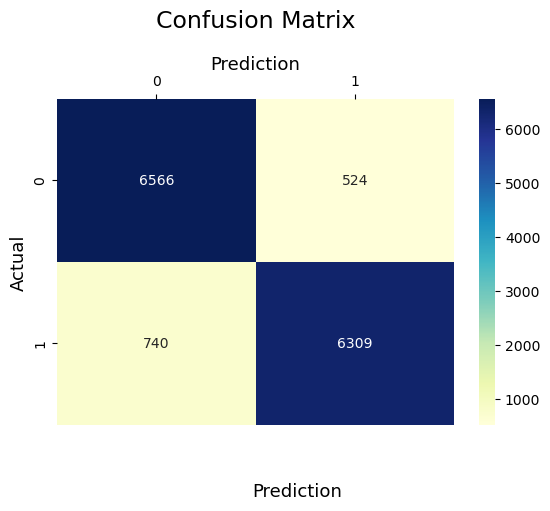

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7090
         1.0       0.92      0.90      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139

Elapsed Time: 0.8231348991394043


In [ ]:
import time
start = time.time()
BLR_a = LogisticRegression(
                    penalty='l2',
                    solver='lbfgs',
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_a = BLR_a.predict(X_test_21)

# accuracy
acc = accuracy_score(y_test_21, y_pred_a)
print(f"Binary Logistic Regression (21 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_21)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_21, y_pred_a)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test_21, y_pred_a))
end = time.time()
print("Elapsed Time:", end - start)

#### **b)** 21 features, L1 reg, solver = 'liblinear'  

Binary Logistic Regression (21 features) accuracy: 0.9103189758823114
Number Correct: 12871 out of 14139


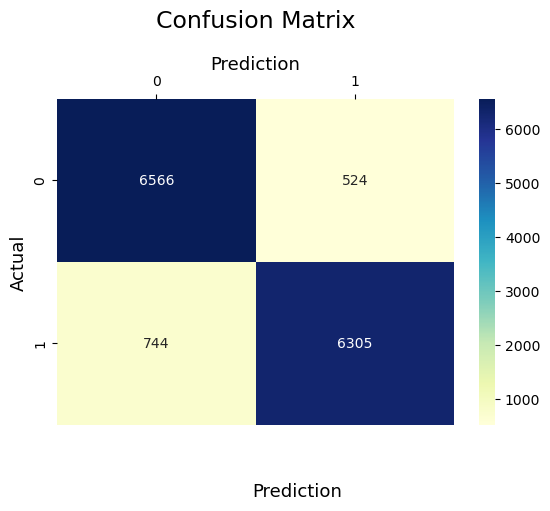

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7090
         1.0       0.92      0.89      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139



In [ ]:
BLR_b = LogisticRegression(
                    penalty='l1',
                    solver='liblinear',
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_b = BLR_b.predict(X_test_21)


# accuracy
acc = accuracy_score(y_test_21, y_pred_b)
print(f"Binary Logistic Regression (21 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_21)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_21, y_pred_b)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test_21, y_pred_b))


### 13 Feature Models (c & d)

#### c) 13 features, L2 reg, solver = 'lbfgs'

Binary Logistic Regression (13 features) accuracy: 0.9106018813211684
Number Correct: 12875 out of 14139


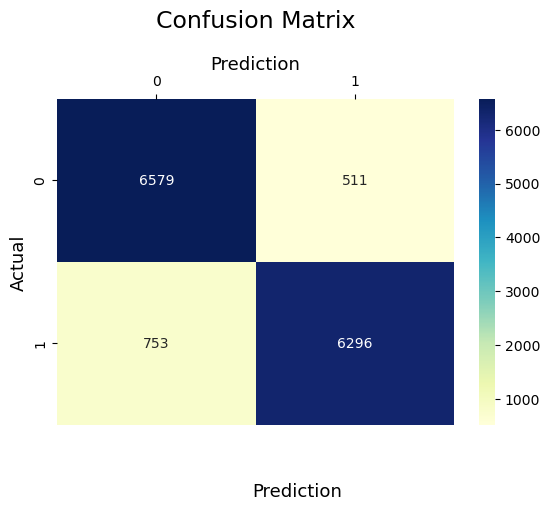

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7090
         1.0       0.92      0.89      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139



In [ ]:
BLR_c = LogisticRegression(
                    penalty='l2',
                    solver='lbfgs',
                    random_state=42).fit(X_train_8, y_train_8)

y_pred_c = BLR_c.predict(X_test_8)

# accuracy
acc = accuracy_score(y_test_8, y_pred_c)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_8)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_8, y_pred_c)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test_8, y_pred_c))

#### **d)** 13 features, L1 reg, solver = 'liblinear'

Binary Logistic Regression (13 features) accuracy: 0.9106018813211684
Number Correct: 12875 out of 14139


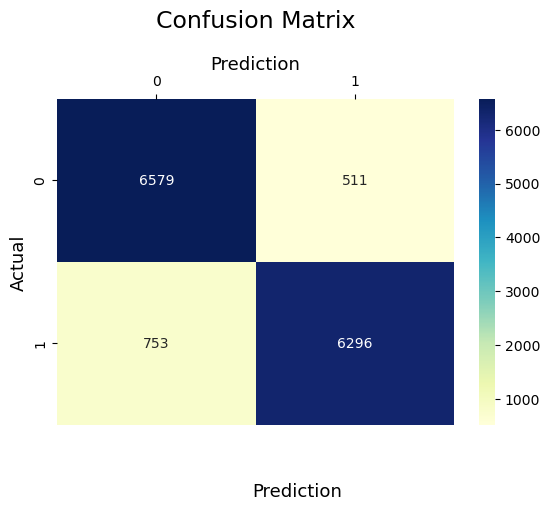

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7090
         1.0       0.92      0.89      0.91      7049

    accuracy                           0.91     14139
   macro avg       0.91      0.91      0.91     14139
weighted avg       0.91      0.91      0.91     14139



In [ ]:
BLR_d = LogisticRegression(
                   penalty='l2',
                    solver='lbfgs',
                    random_state=42).fit(X_train_8, y_train_8)

y_pred_d = BLR_d.predict(X_test_8)

# accuracy
acc = accuracy_score(y_test_8, y_pred_c)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_8)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_8, y_pred_d)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test_8, y_pred_d))

### AIC and Final Statistics

In [ ]:
# AIC
models = [BLR_a, BLR_b, BLR_c, BLR_d]
X_tests = [X_test_21, X_test_21, X_test_8, X_test_8]
y_tests = [y_test_21, y_test_21, y_test_8, y_test_8]

aic = []
accuracy = []

for i, model in enumerate(models):
    X_test = X_tests[i]
    y_test = y_tests[i]

    k = len(model.coef_.ravel()) + 1
    probs = model.predict_proba(X_test)[:, 1]
    probs = np.clip(probs, 1e-15, 1 - 1e-15)
    log_likelihood = np.sum(y_test * np.log(probs) + (1 - y_test) * np.log(1 - probs))
    AIC = 2 * k - 2 * log_likelihood

    acc = accuracy_score(y_test, model.predict(X_test))

    aic.append(AIC)
    accuracy.append(acc)

    print(f"Model {chr(ord('a') + i)}) Accuracy: {acc:.4f}, AIC: {AIC:.4f}")

lowest_aic = np.argmin(aic)
highest_accuracy = np.argmax(accuracy)

print("\n")
print("Lowest AIC Model:")
print(f"Model {chr(ord('a') + lowest_aic)}) AIC = {aic[lowest_aic]:.2f} and Accuracy = {accuracy[lowest_aic]:.4f}\n")
print("Highest Accuracy Model:")
print(f"Model {chr(ord('a') + highest_accuracy)}) AIC = {aic[highest_accuracy]:.2f} and Accuracy = {accuracy[highest_accuracy]:.4f}\n")

Model a) Accuracy: 0.9106, AIC: 5123.8258
Model b) Accuracy: 0.9103, AIC: 5113.1011
Model c) Accuracy: 0.9106, AIC: 5138.8981
Model d) Accuracy: 0.9106, AIC: 5138.8981


Lowest AIC Model:
Model b) AIC = 5113.10 and Accuracy = 0.9103

Highest Accuracy Model:
Model a) AIC = 5123.83 and Accuracy = 0.9106



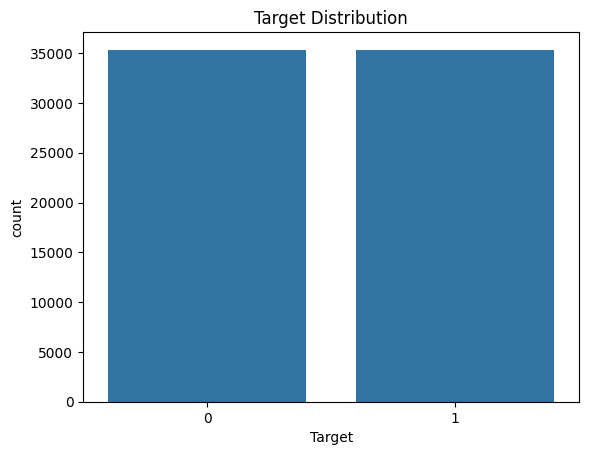


--- CV results for RandomForest ---
accuracy  : 0.9057 ± 0.0013
precision : 0.9137 ± 0.0012
recall    : 0.8962 ± 0.0036
f1        : 0.9048 ± 0.0015
Average testing time per fold: 0.2298 seconds

--- CV results for XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

accuracy  : 0.9101 ± 0.0018
precision : 0.9225 ± 0.0037
recall    : 0.8955 ± 0.0042
f1        : 0.9088 ± 0.0019
Average testing time per fold: 0.0694 seconds

--- CV results for LightGBM ---
[LightGBM] [Info] Number of positive: 22621, number of negative: 22621
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 45242, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22621, number of negative: 22621
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing time: 0.0876 seconds
Confusion Matrix:
[[6523  547]
 [ 713 6356]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9015    0.9226    0.9119      7070
           1     0.9208    0.8991    0.9098      7069

    accuracy                         0.9109     14139
   macro avg     0.9111    0.9109    0.9109     14139
weighted avg     0.9111    0.9109    0.9109     14139


=== Final evaluation for LightGBM ===
[LightGBM] [Info] Number of positive: 28277, number of negative: 28276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 56553, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --- LOAD DATA ---
url = 'https://drive.google.com/uc?id=1d21XE-eTEJHvyneON2MVs0LuUM3loZgg'
df = pd.read_csv(url)

df = df.rename(columns={"Diabetes_binary": "Target"})
df['Target'] = df['Target'].astype(int)

# --- EDA (optional) ---
sns.countplot(x='Target', data=df)
plt.title("Target Distribution")
plt.show()

# --- FEATURES / LABELS ---
X_raw = df.drop('Target', axis=1)
y = df['Target']

# One-Hot Encode categorical columns (treat all columns as categorical for safety)
X_encoded = pd.get_dummies(X_raw.astype(str), prefix=X_raw.columns.astype(str))
X = X_encoded

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- CLASS WEIGHTS ---
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, weights))

# --- MODELS ---
models = {
    'RandomForest': RandomForestClassifier(
        class_weight=class_weight_dict, random_state=42
    ),
    'XGBoost': XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        tree_method='hist',
        use_label_encoder=False,
        random_state=42
    ),
    'LightGBM': LGBMClassifier(
        objective='binary',
        class_weight='balanced',
        n_estimators=100,
        random_state=42
    )
}

# --- CROSS-VALIDATION ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

for name, model in models.items():
    print(f"\n--- CV results for {name} ---")
    scores = {metric: [] for metric in scoring}
    total_time = 0

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        if name == 'XGBoost':
            sw = y_tr.map(class_weight_dict)
            model.fit(X_tr, y_tr, sample_weight=sw)
        else:
            model.fit(X_tr, y_tr)

        start_time = time.time()
        y_pred = model.predict(X_val)
        elapsed_time = time.time() - start_time
        total_time += elapsed_time

        scores['accuracy'].append(accuracy_score(y_val, y_pred))
        scores['precision'].append(precision_score(y_val, y_pred))
        scores['recall'].append(recall_score(y_val, y_pred))
        scores['f1'].append(f1_score(y_val, y_pred))

    for metric in scoring:
        mean = np.mean(scores[metric])
        std = np.std(scores[metric])
        print(f"{metric:10s}: {mean:.4f} ± {std:.4f}")
    print(f"Average testing time per fold: {total_time / cv.get_n_splits():.4f} seconds")

# --- FINAL EVALUATION ON TEST SET ---
for name, model in models.items():
    print(f"\n=== Final evaluation for {name} ===")
    if name == 'XGBoost':
        sw = y_train.map(class_weight_dict)
        model.fit(X_train, y_train, sample_weight=sw)
    else:
        model.fit(X_train, y_train)

    start_time = time.time()
    y_pred = model.predict(X_test)
    total_time = time.time() - start_time
    print(f"Testing time: {total_time:.4f} seconds")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))


In [ ]:
# --- Import libraries ---
%matplotlib inline
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# --- Load and preprocess data ---
df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/BMIClassGege.csv")

# Assume first column is the label
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Should be 0 or 1 for binary

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Define model builder for KerasTuner ---
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units1', min_value=16, max_value=128, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- Run the tuner ---
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='.',
    project_name='bmi_tuning'
)

tuner.search(X_train, y_train, epochs=30, validation_split=0.2, batch_size=64, verbose=1)

# --- Evaluate best model ---
best_model = tuner.get_best_models(1)[0]
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"\n Best model test accuracy: {test_acc:.4f}")

# --- Show best hyperparameters ---
best_hps = tuner.get_best_hyperparameters(1)[0]
print("\nBest Hyperparameters Found:")
for k, v in best_hps.values.items():
    print(f"{k}: {v}")


Trial 10 Complete [00h 01m 02s]
val_accuracy: 0.9078772664070129

Best val_accuracy So Far: 0.9110600352287292
Total elapsed time: 00h 09m 53s


C:\Users\ayush\miniconda3\envs\cenv4py310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9078 - loss: 0.1806

 Best model test accuracy: 0.9102

🎯 Best Hyperparameters Found:
units1: 16
num_layers: 3
units_0: 16
activation: relu
learning_rate: 0.006156805850411143
units_1: 80
units_2: 128
